# Red Wine Quality Prediction Project

Importing Relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

 Data Collection

In [2]:
wine_ds = pd.read_csv("winequality-red.csv")


wine_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_ds.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
# To check the shape of the data

print("Rows, columns: " + str(wine_ds.shape))

Rows, columns: (1599, 12)


In [5]:
#Now let’s have a look at all the columns the dataset contains:

print(wine_ds.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [6]:
print(f"The rows and columns in the dataset: {wine_ds.shape}")

print(f"\n The column headers in the dataset: {wine_ds.columns}")

The rows and columns in the dataset: (1599, 12)

 The column headers in the dataset: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [7]:
#Now let’s have a look at the column info:

print(wine_ds.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [8]:
# Having a look at the datatypes

wine_ds.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
#Next, we look at the descriptive statistics of the data:

wine_ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


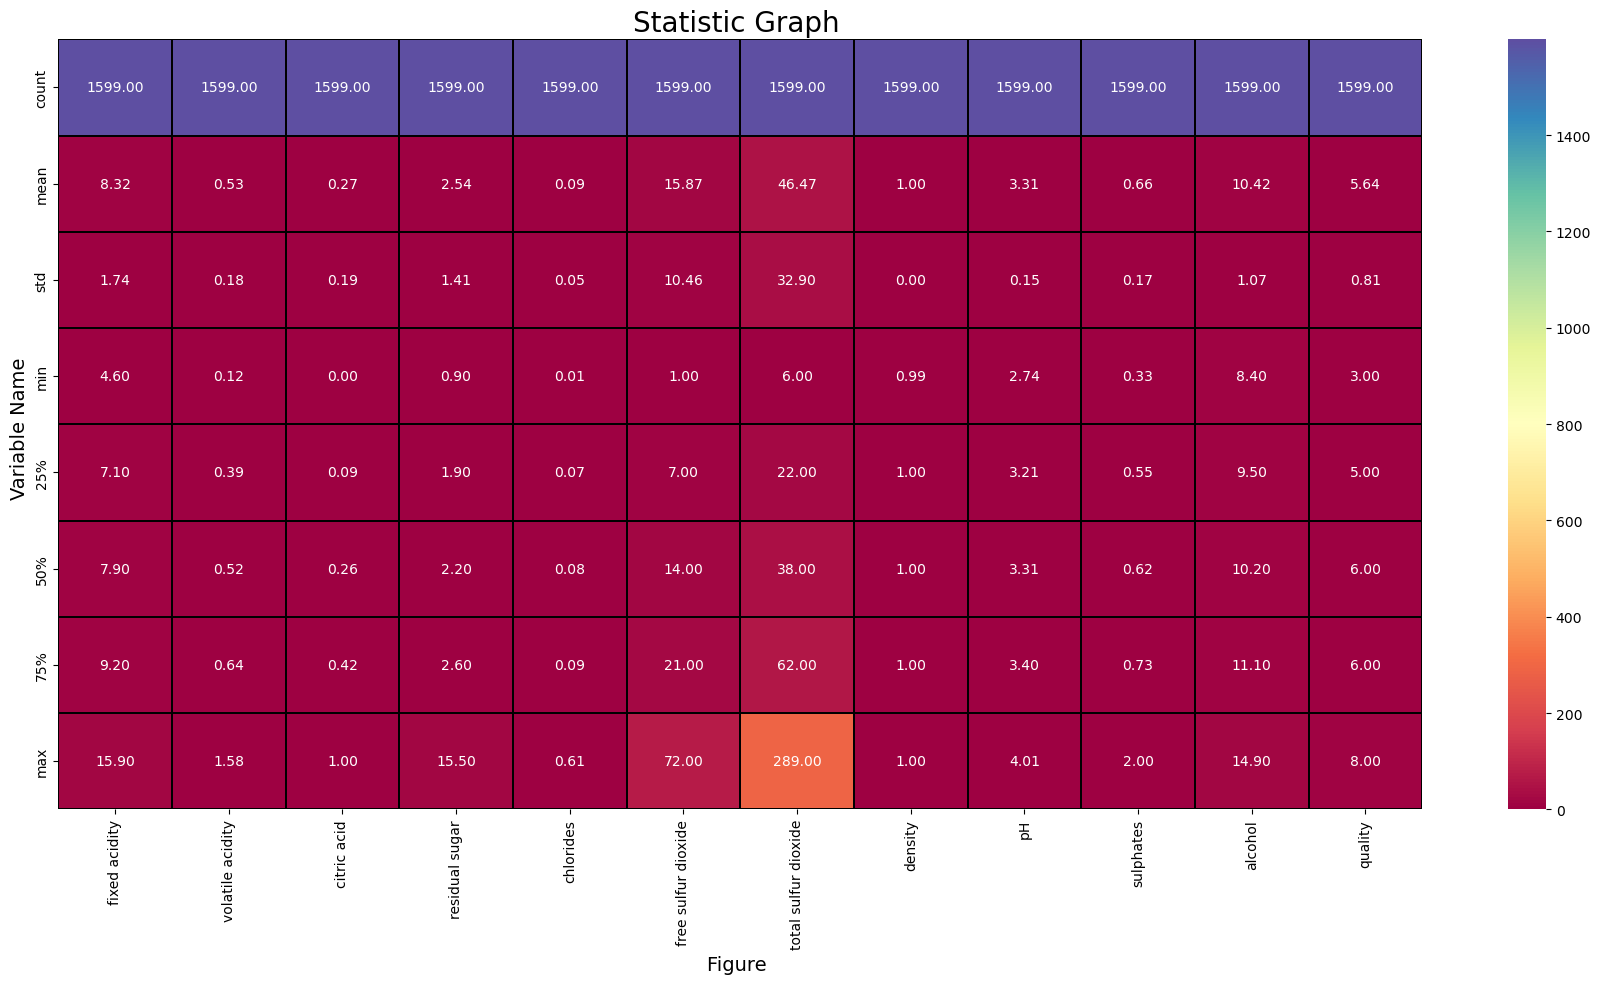

In [10]:
#using heatmap to check the describe method

plt.figure(figsize=(22,10))
sns.heatmap(wine_ds.describe(), annot = True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure ',fontsize=14)
plt.ylabel('Variable Name ', fontsize=14)
plt.title('Statistic Graph ',fontsize=20)
plt.show()

# Data cleaning and pre-processing

In [11]:
# Let's have a look if your data contains any missing values or not:


print(wine_ds.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<Axes: >

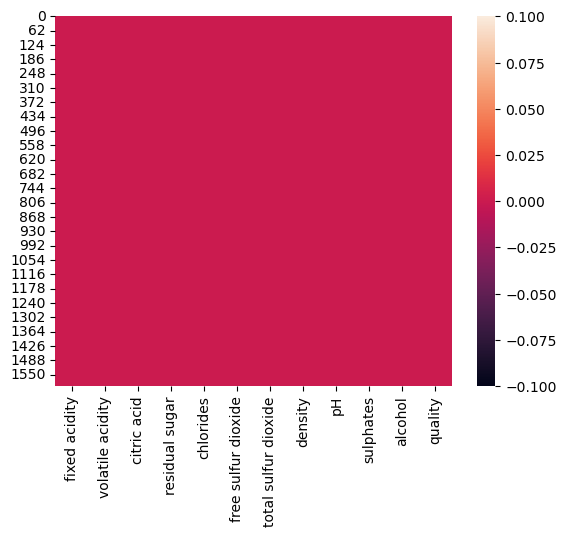

In [12]:
# Lets visualize mising values using heatmap 

sns.heatmap(wine_ds.isnull())

In [13]:
# checking number of unique values in each column

#df.nunique()

wine_ds.nunique().to_frame("Number of unique values")

,Number of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [14]:
# checking the value counts of each column
#df.value_counts()

for i in wine_ds.columns:
    print(wine_ds[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [15]:
# Checking duplicate rows in the data set


print("Total Duplicate Rows are ", wine_ds.duplicated().sum())

Total Duplicate Rows are  240


In [16]:
# Drop the duplicate rows from the dataset

wine_ds.drop_duplicates(subset=None, keep="first", inplace=True)


# Count the total number of duplicate rows in the new dataset to verify

print("Total Duplicate Rows are ", wine_ds.duplicated().sum())


Total Duplicate Rows are  0


In [17]:
# classify wine quality

def classify_wine_quality(quality):
    if quality >= 7:
        return 1  # 'good/1'
    else:
        return 0  # 'not good/0'

# create a new 'quality_label' column
wine_ds['quality_label'] = wine_ds['quality'].apply(classify_wine_quality)

# Drop the original 'quality' column
wine_ds.drop('quality', axis=1, inplace=True)

# Group by the new 'quality_label' column to view the distribution across the two classes
grouped_data = wine_ds.groupby("quality_label").count()

# Show the first few rows of the updated DataFrame and the distribution of the new classes
wine_ds.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [18]:
wine_ds['quality_label'].value_counts()

0    1175
1     184
Name: quality_label, dtype: int64

In [19]:
# what is the correlation between the variables and wine quality? 

wine_ds.corr(numeric_only=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.116120
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.267344
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.203561
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.052811
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.096806
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.072771
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.135877
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.158052
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.054131
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.201551


Text(0.5, 1.0, 'Correlation between label and features using barplot')

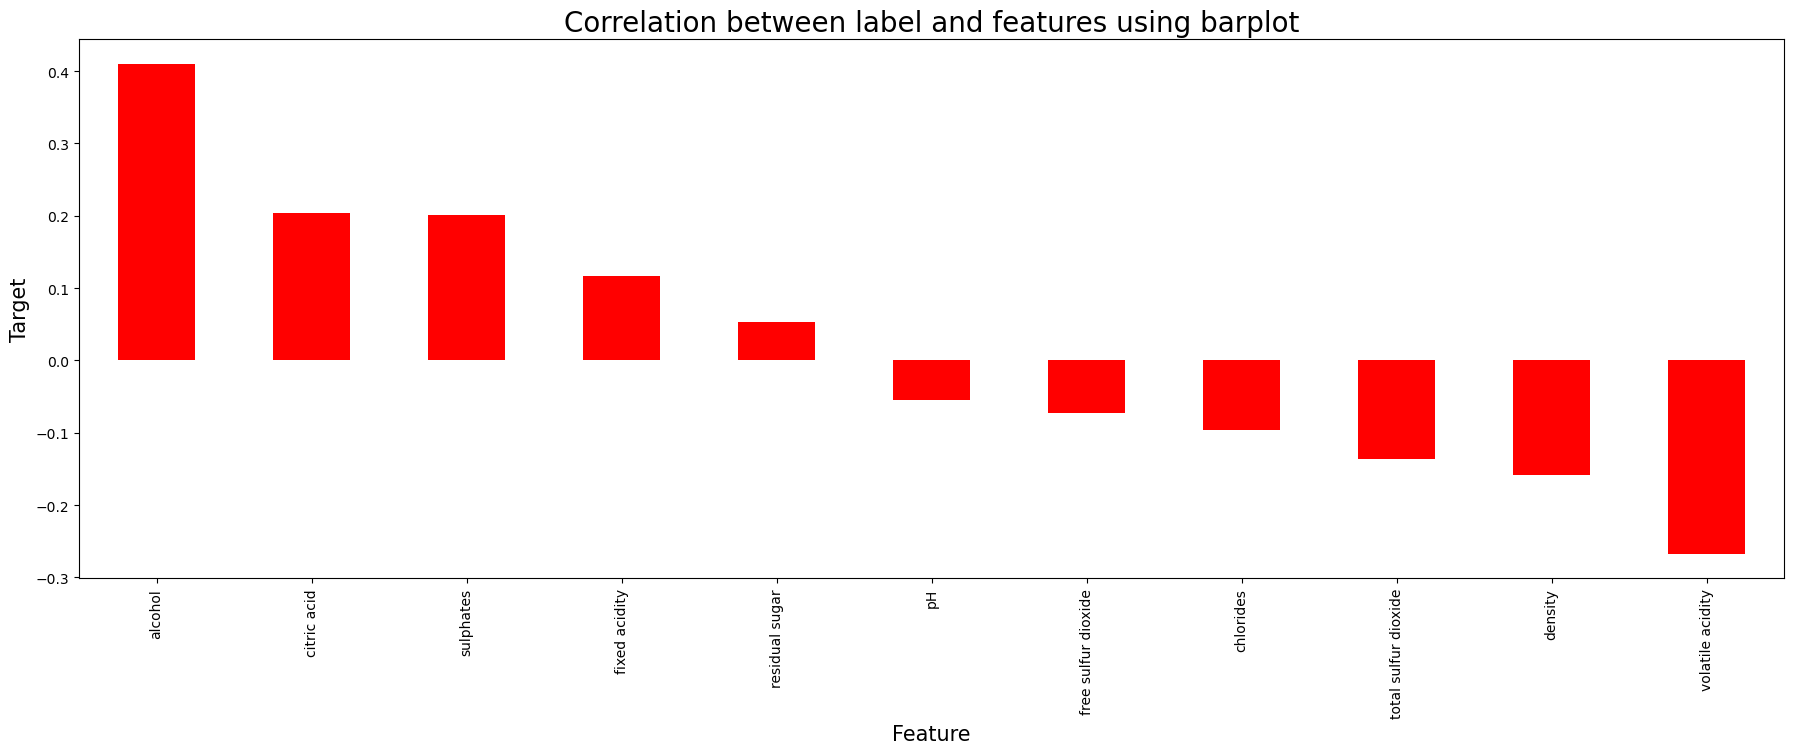

In [24]:
plt.figure(figsize = (22, 7))
wine_ds.corr()['quality_label'].sort_values(ascending = False).drop(['quality_label']).plot(kind='bar',color='r')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)

# Data Visualization

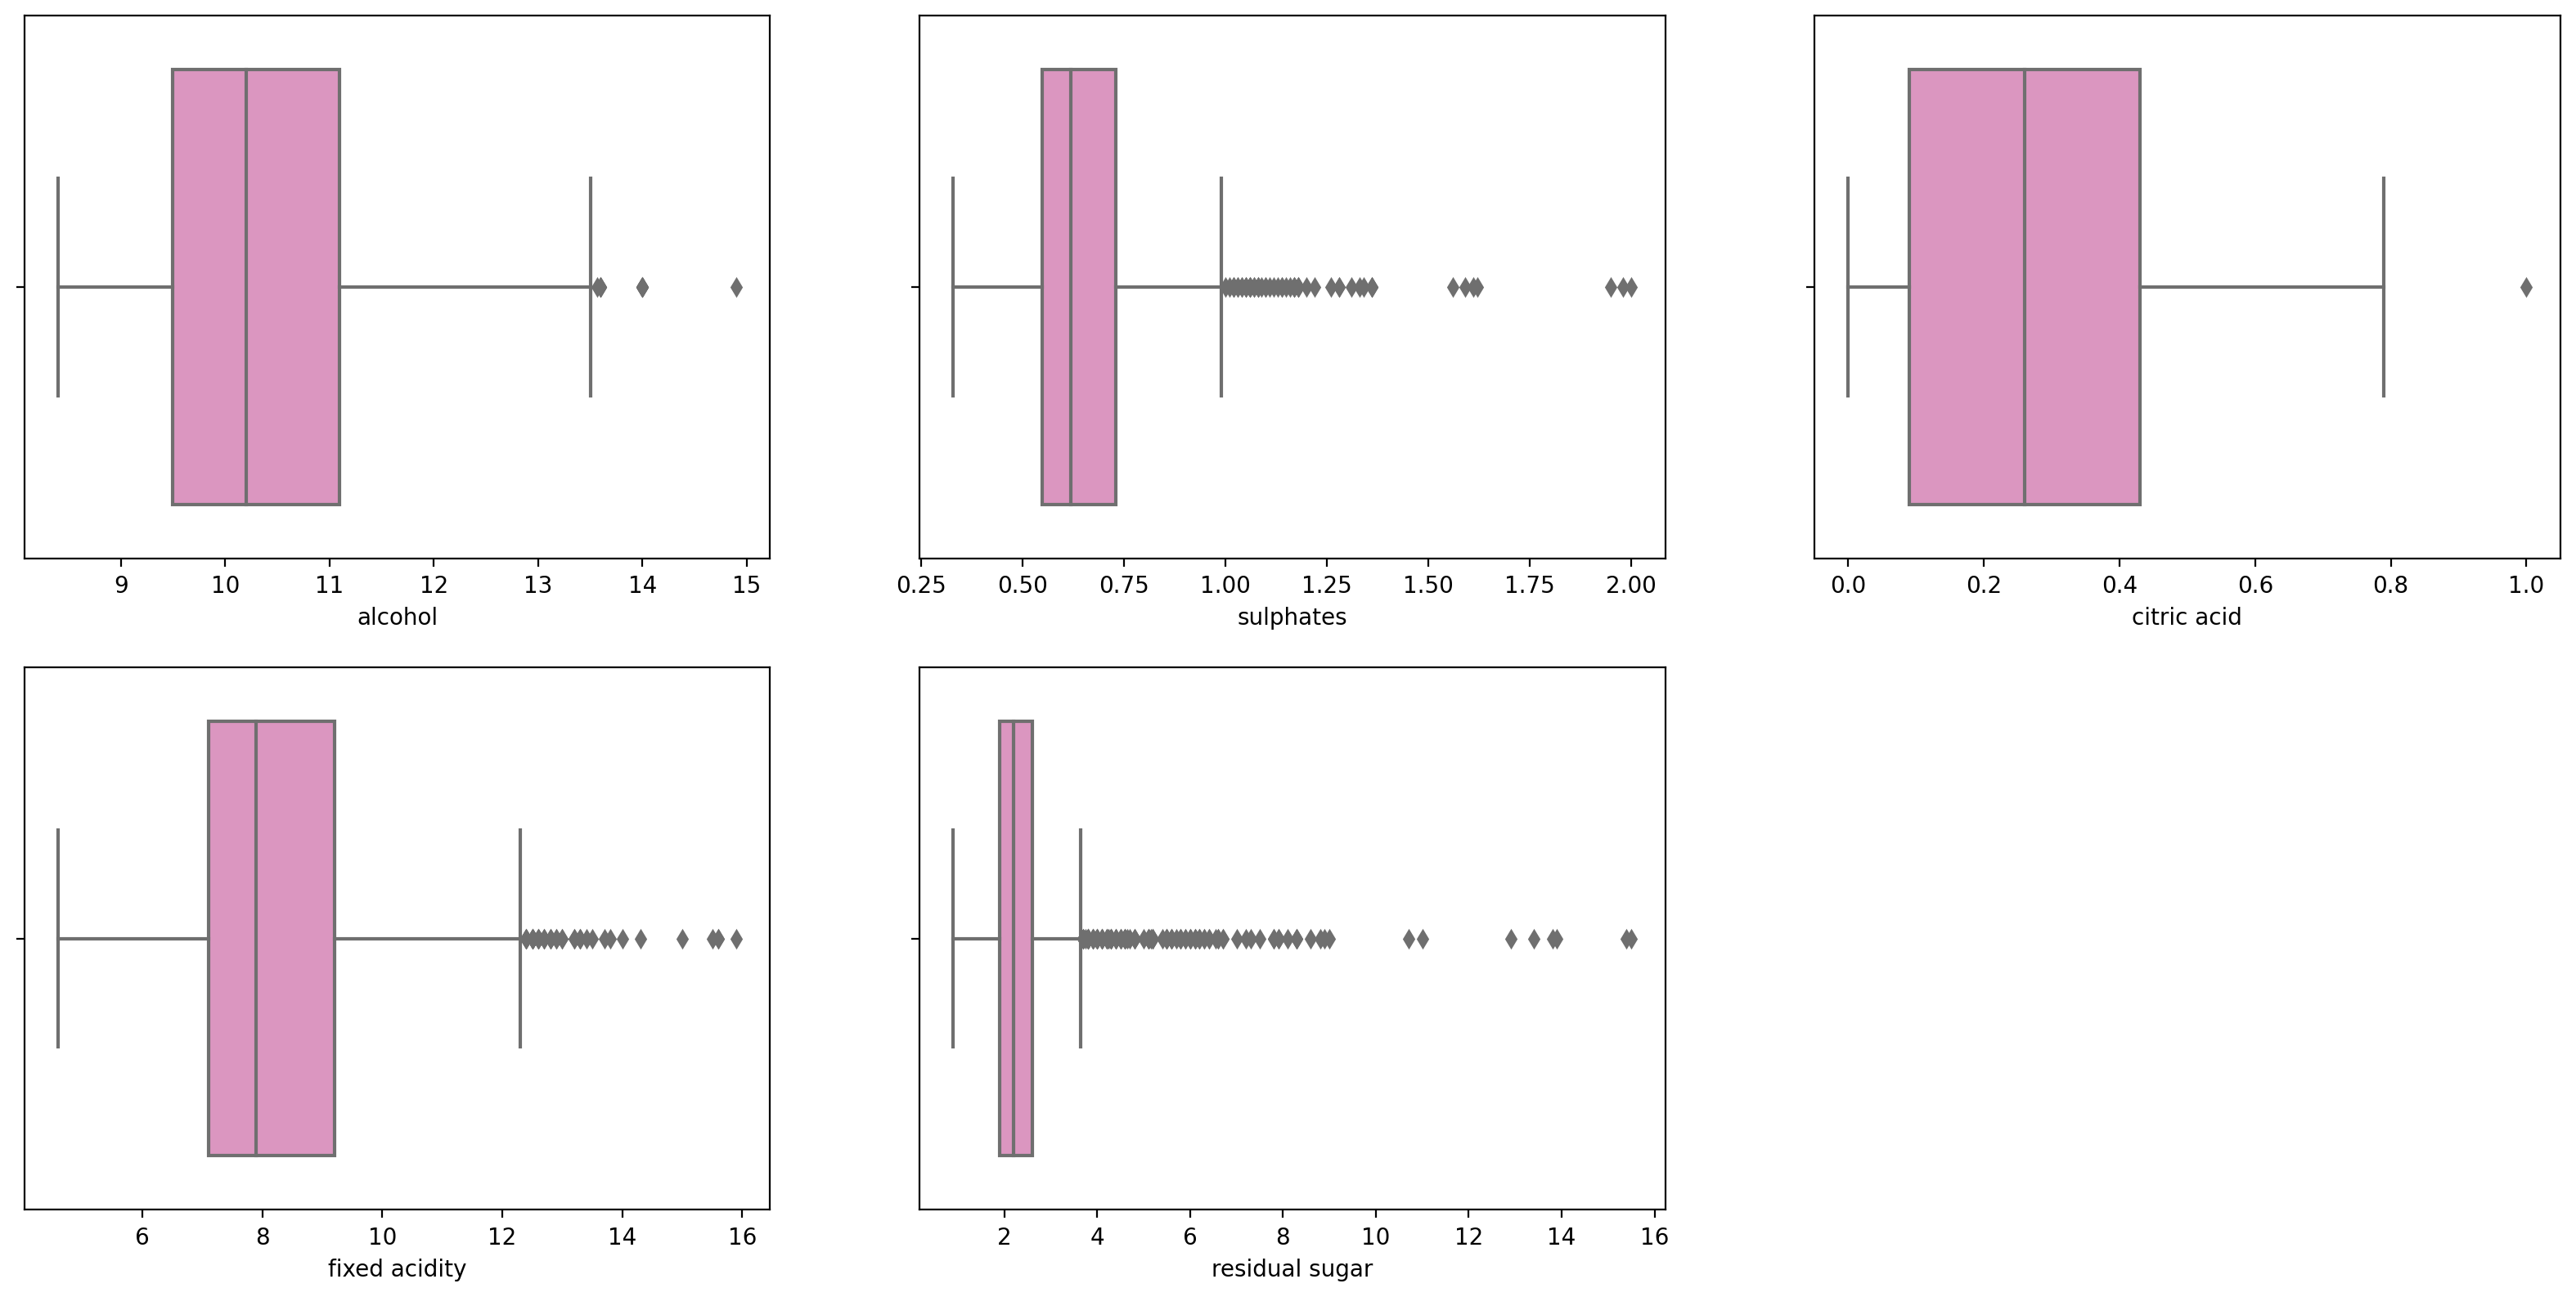

In [27]:
# lets check the outliers by plotting boxplot

# Select the top 5 most correlated columns with "quality"
top_6_wines_by_quality = ['alcohol', 'sulphates', 'citric acid', 'fixed acidity', 'residual sugar']

plt.figure(figsize = (20,25))
counter = 1
for col in top_6_wines_by_quality:
    plt.subplot(5, 3, counter)
    sns.boxplot(x=wine_ds[col], palette="Set2_r")

    plt.xlabel(col)
    counter += 1

plt.show()

from the above, we found outlier in all columns.

so, removing the outliers using zscore and IQR techniques before building the model and selected best one.


In [30]:
from scipy.stats import zscore
top_6_wines_by_quality = wine_ds[['alcohol', 'sulphates', 'citric acid', 'fixed acidity', 'residual sugar']]

z=np.abs(zscore(top_6_wines_by_quality))

z

# abs means absolute value. it converts any negatives to positive

,alcohol,sulphates,citric acid,fixed acidity,residual sugar
0,0.954374,0.578561,1.393258,0.524431,0.461157
1,0.584575,0.124822,1.393258,0.294063,0.056665
2,0.584575,0.051024,1.188617,0.294063,0.165259
3,0.584575,0.461331,1.471711,1.664067,0.461157
5,0.954374,0.578561,1.393258,0.524431,0.535132
...,...,...,...,...,...
1593,0.861924,0.945435,0.983977,0.869983,0.461157
1594,0.062574,0.461331,0.983977,1.215536,0.387183
1595,0.709723,0.593744,0.881656,1.388312,0.239233
1597,0.214775,0.300667,0.779336,1.388312,0.387183


In [31]:
np.where(z>3)

(array([  11,   15,   30,   39,   75,   80,   82,   85,   96,  127,  135,
         135,  144,  145,  150,  202,  214,  226,  241,  282,  295,  296,
         302,  328,  334,  346,  361,  363,  385,  408,  420,  433,  473,
         483,  485,  510,  516,  534,  555,  562,  565,  565,  565,  626,
         687,  710,  764,  781,  786,  888,  895,  912,  918,  920, 1013,
        1052, 1060, 1081, 1082, 1123, 1159, 1216, 1250, 1325, 1336, 1350],
       dtype=int64),
 array([1, 1, 4, 1, 1, 1, 1, 1, 1, 0, 1, 2, 4, 4, 1, 1, 3, 1, 4, 4, 1, 1,
        3, 3, 3, 4, 4, 4, 3, 0, 4, 4, 3, 3, 3, 0, 4, 1, 1, 4, 0, 3, 4, 1,
        1, 0, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 0, 0, 1, 1, 4, 4, 4, 4, 4],
       dtype=int64))

In [34]:
z.iloc[30,4]

6.0486040101274146

In [33]:
z.iloc[214,3]

3.8525651981024946

In [35]:
# Now removing the outliers
# keeping all the columns where the z value is less than 3

df = wine_ds[(z<3).all(axis=1)]

df.shape

(1296, 12)

In [36]:
# shape of old and new DataFrame

print("Old Data Frame - ", wine_ds.shape[0])

print("New Data Frame - ", df.shape[0])

Old Data Frame -  1359
New Data Frame -  1296


In [37]:
# checking the data loss

print("Data Loss percentage- ", ((wine_ds.shape[0]-df.shape[0])/wine_ds.shape[0])*100)

Data Loss percentage-  4.635761589403973


it is affordable loss of data

In [38]:
wine_ds=df

In [39]:
# checking skewness

wine_ds.skew()

fixed acidity           0.768070
volatile acidity        0.735953
citric acid             0.275564
residual sugar          2.310933
chlorides               5.077263
free sulfur dioxide     1.077332
total sulfur dioxide    1.213227
density                -0.073139
pH                      0.357283
sulphates               1.062404
alcohol                 0.765530
quality_label           2.148030
dtype: float64

In [40]:
# Removing skewness in volume column using cuberoot method

wine_ds['sulphates'] = np.cbrt(wine_ds['sulphates'])


wine_ds['residual sugar'] = np.cbrt(wine_ds['residual sugar'])

In [41]:
wine_ds.skew()

fixed acidity           0.768070
volatile acidity        0.735953
citric acid             0.275564
residual sugar          1.480322
chlorides               5.077263
free sulfur dioxide     1.077332
total sulfur dioxide    1.213227
density                -0.073139
pH                      0.357283
sulphates               0.653628
alcohol                 0.765530
quality_label           2.148030
dtype: float64

In [46]:
# Seperating the Independent and target variables into x and y

x = wine_ds[['alcohol', 'sulphates', 'citric acid', 'fixed acidity', 'residual sugar']]

y = wine_ds.iloc[:, -1]

In [47]:
x.head()

,alcohol,sulphates,citric acid,fixed acidity,residual sugar
0,9.4,0.824257,0.00,7.4,1.238562
1,9.8,0.879366,0.00,7.8,1.375069
2,9.8,0.866239,0.04,7.8,1.320006
3,9.8,0.833955,0.56,11.2,1.238562
5,9.4,0.824257,0.00,7.4,1.216440


In [48]:
y.head()

0    0
1    0
2    0
3    0
5    0
Name: quality_label, dtype: int64

Modelling

In [52]:
# Importing necessary libraries:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler

In [50]:
# split the data into training and testing set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state = 42)

In [53]:
# standardisation 

# dont fit x_test only transform so no overfitting 

scaler_x = StandardScaler()

x_train = scaler_x.fit_transform(x_train)

x_test = scaler_x.transform(x_test)

# Logistic Regression

In [54]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [55]:
# make prediction 
y_pred_log = log_reg.predict(x_test)
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [57]:
# evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, y_pred_log)

## CONFUSION MATRIX
conf_mat_lr = confusion_matrix(y_test, y_pred_log)

print(accuracy_LR)
print(conf_mat_lr)

0.8580246913580247
[[264  11]
 [ 35  14]]


In [58]:
# classification report

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       275
           1       0.56      0.29      0.38        49

    accuracy                           0.86       324
   macro avg       0.72      0.62      0.65       324
weighted avg       0.83      0.86      0.84       324



AUC: 0.62


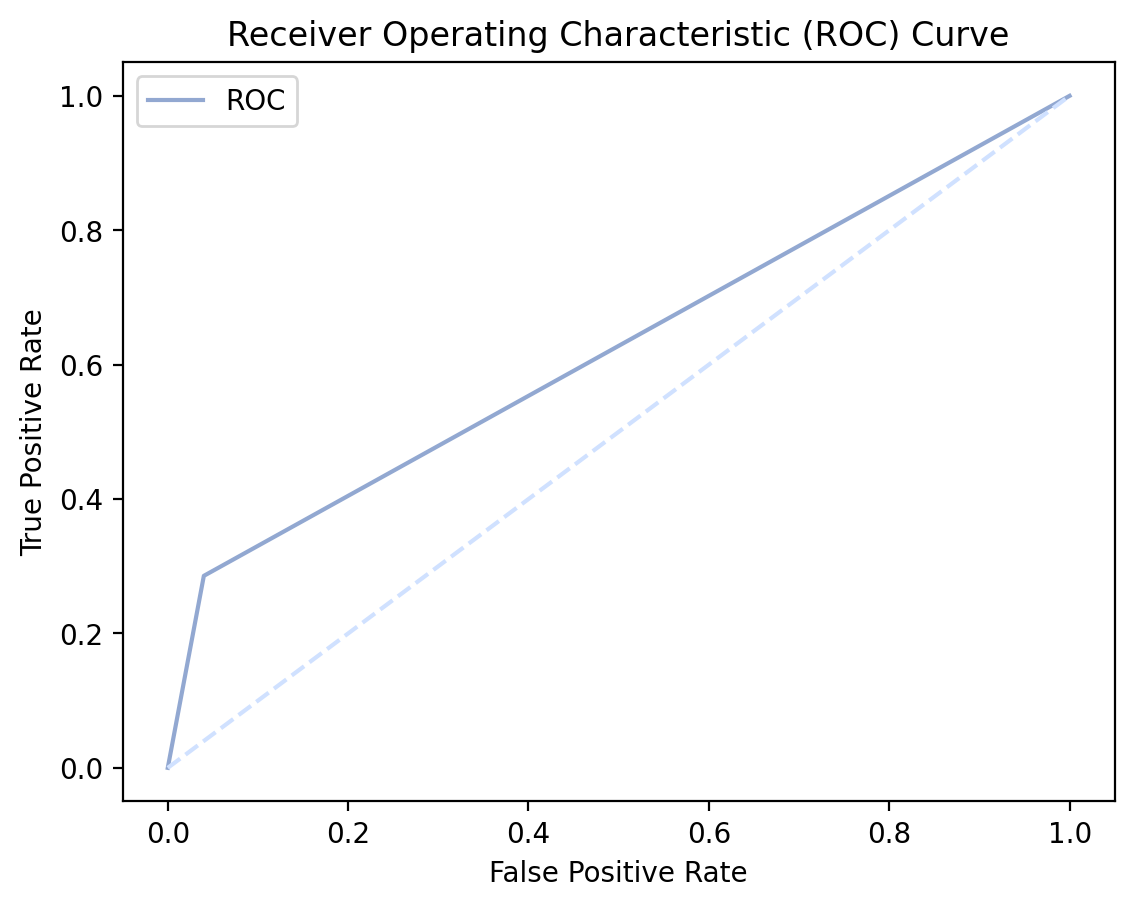

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve

# roc curve
auc_mod1 = roc_auc_score(y_test, y_pred_log)
print('AUC: %.2f' %auc_mod1)

fpr, tpr, _ = roc_curve(y_test, y_pred_log)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#d0e1ff', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [60]:
# fit our knn model
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [61]:
# make prediction
y_pred_knn = knn_model.predict(x_test)

In [62]:
# evaluate the model accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

## CONFUSION MATRIX
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

print(accuracy_knn)
print(conf_mat_knn)

0.8549382716049383
[[264  11]
 [ 36  13]]


In [63]:
## classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       275
           1       0.54      0.27      0.36        49

    accuracy                           0.85       324
   macro avg       0.71      0.61      0.64       324
weighted avg       0.83      0.85      0.83       324



AUC: 0.612653


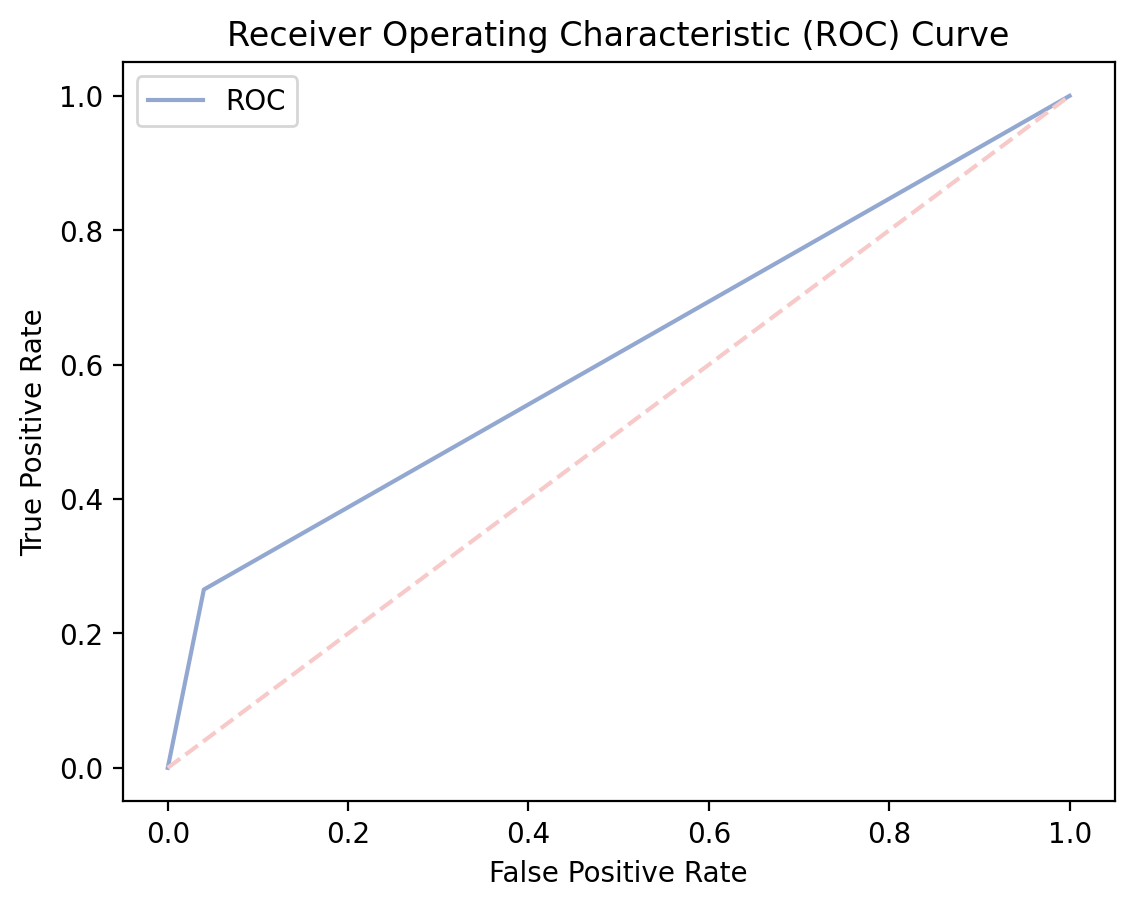

In [68]:
# roc curve
auc_mod2 = roc_auc_score(y_test, y_pred_knn)
print('AUC: %f' %auc_mod3)

fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#f7cac9', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [67]:
# Decision Tree Classifier

DT_model = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42, criterion='gini')
DT_model.fit(x_train, y_train)

# make prediction
DT_pred = DT_model.predict(x_test)

# evaluate the model accuracy
DT_acc = accuracy_score(y_test, DT_pred)

# CONFUSION MATRIX
conf_mat_DT = confusion_matrix(y_test, DT_pred)

print(DT_acc)
print(conf_mat_DT)

0.8549382716049383
[[256  19]
 [ 28  21]]


In [66]:
# classification report

print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       275
           1       0.53      0.43      0.47        49

    accuracy                           0.85       324
   macro avg       0.71      0.68      0.69       324
weighted avg       0.84      0.85      0.85       324



AUC: 0.612653


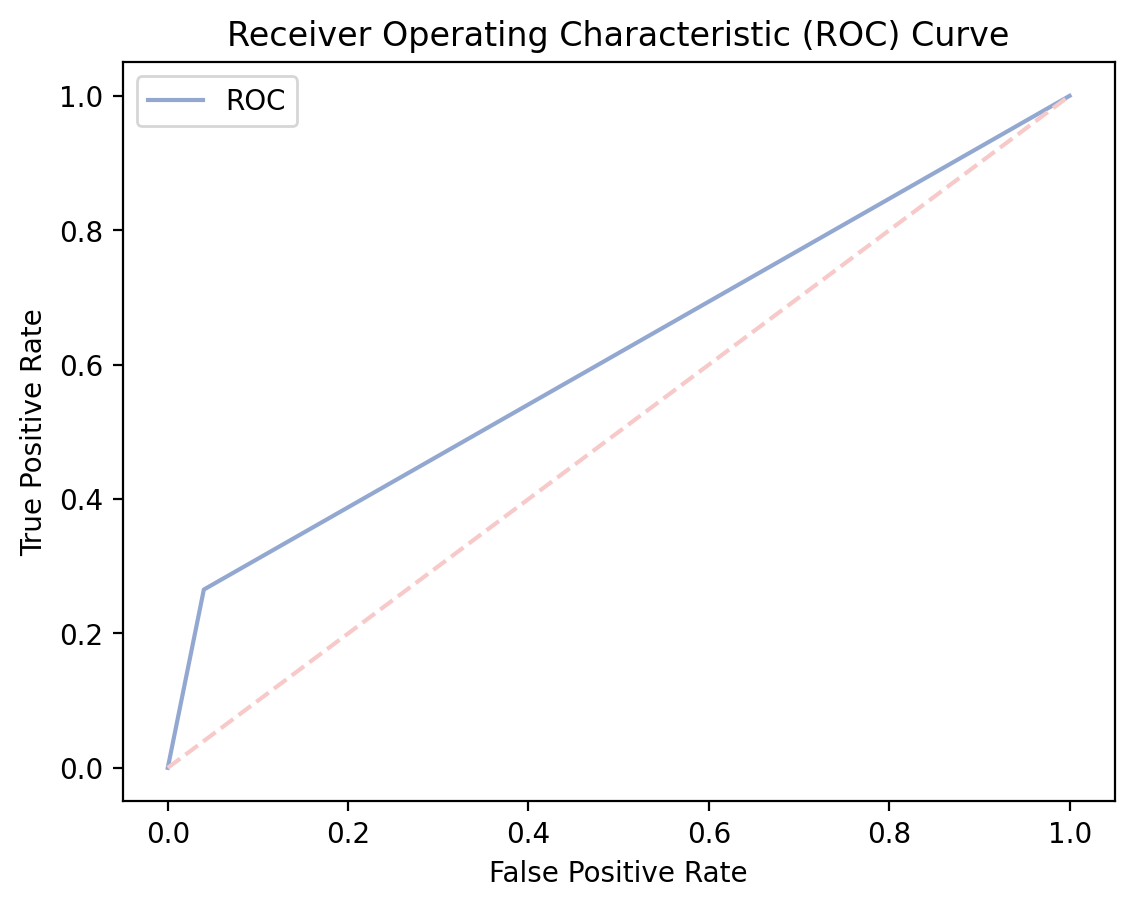

In [69]:
# roc curve
auc_mod3 = roc_auc_score(y_test, y_pred_knn)
print('AUC: %f' %auc_mod3)

fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#f7cac9', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()